## Dealing with other data types
Python can deal with basically any type of data you throw at it. The community have provided many packages that make things easy, today we will look at the "pyshp" (for dealing with shapefiles) and "pandas" (great for tables nad time series) packages.

Data for this exercised was downloaded from http://www.bom.gov.au/water/groundwater/explorer/map.shtml

# Shapefiles
Shapefiles are a very common file format for GIS data.

In [1]:
#Load the required modules
import shapefile

#NOTE: Weirdly and confusingly, this package is called "pyshp" but you call it via the name "shapefile"

In [2]:
help(shapefile)
#Or check out the help pages https://github.com/GeospatialPython/pyshp

Help on module shapefile:

NAME
    shapefile

FILE
    c:\users\nbutter\anaconda3\envs\pygeol\lib\site-packages\shapefile.py

DESCRIPTION
    shapefile.py
    Provides read and write support for ESRI Shapefiles.
    author: jlawhead<at>geospatialpython.com
    date: 2017/08/24
    version: 1.2.12
    Compatible with Python versions 2.7-3.x

CLASSES
    exceptions.Exception(exceptions.BaseException)
        ShapefileException
    Reader
    Writer
        Editor
    
    class Editor(Writer)
     |  Methods defined here:
     |  
     |  __init__(self, shapefile=None, shapeType=1, autoBalance=1)
     |  
     |  balance(self)
     |      Adds a corresponding empty attribute or null geometry record depending
     |      on which type of record was created to make sure all three files
     |      are in synch.
     |  
     |  delete(self, shape=None, part=None, point=None)
     |      Deletes the specified part of any shape by specifying a shape
     |      number, part number, or point

In [3]:
#Set the filename
boreshape='../data/shp_torrens_river/NGIS_BoreLine.shp'

#read in the file
shapeRead = shapefile.Reader(boreshape)

#And save out some of the shape file attributes
recs    = shapeRead.records()
shapes  = shapeRead.shapes()
fields  = shapeRead.fields
Nshp    = len(shapes)

In [4]:
print(Nshp) #print the Number of items in the shapefile

7635


In [5]:
fields[:]#print the fields

[('DeletionFlag', 'C', 1, 0),
 ['HydroID', 'N', 10, 0],
 ['HydroCode', 'C', 30, 0],
 ['BoreID', 'N', 10, 0],
 ['TopElev', 'F', 19, 11],
 ['BottomElev', 'F', 19, 11],
 ['HGUID', 'N', 10, 0],
 ['HGUNumber', 'N', 10, 0],
 ['NafHGUNumb', 'N', 10, 0],
 ['SHAPE_Leng', 'F', 19, 11]]

In [6]:
recs[0] #print the first record, then this is a list that can be subscripted further

[32001999, '652800645', 30027773, 6.74, -74.26, 31000043, 1042, 104005, 0.0]

In [7]:
shapes[0].points #print the point values of the first shape

[(591975.5150000006, -3816141.8817), (591975.5150000006, -3816141.8817)]

Shapefiles are not a native python format, but the community have developed tools for exploring them. The package we have used "pyshp" imported with the name "shapefile" (for some non-consistent weird reason), is one example of working with shapefiles. Alternatives exist.

## More table manipulation

In [8]:
#Import the module
import pandas

In [9]:
#read in the data
log_data=pandas.read_csv("../data/shp_torrens_river/NGIS_LithologyLog.csv",\
                         header=0,sep=',',skipinitialspace=True,quotechar ='"',\
                         usecols=list(range(0,13)),\
                         skiprows=[453,456,458,460,689,697,720,723,726,839,880,884,885,890,898,934])

#This data was weird because it has quotation marks to signify inches inside comments within the file, 
#making automatic reading of it tricky

In [10]:
log_data           # print the first 30 and last 30 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata
3,1770725,30141910,662816624,4.0,NGS,0.0,6.0,4.0,-2.0,None,None,No sample,SAGeodata
4,1770726,30141910,662816624,4.0,NGS,6.0,15.0,-2.0,-11.0,CLYU,None,"Clay - orange-red grey, mottled; stiff-sticky....",SAGeodata
5,1770727,30141910,662816624,4.0,NGS,15.0,18.0,-11.0,-14.0,CLYU,None,"Sandy clay - red brown, grey, green, white mot...",SAGeodata
6,1770728,30141910,662816624,4.0,NGS,18.0,21.0,-14.0,-17.0,CLYU,None,"Clay - red green mottled; stiff. fine sand, qtz.",SAGeodata
7,1770729,30141910,662816624,4.0,NGS,21.0,24.0,-17.0,-20.0,SAND,None,Clayey sand - orange green mottled; stiff. fin...,SAGeodata
8,1770730,30141910,662816624,4.0,NGS,24.0,28.5,-20.0,-24.5,CLYU,None,"Clay - red-green grey, mottled; stiff.",SAGeodata
9,1770731,30141910,662816624,4.0,NGS,28.5,30.0,-24.5,-26.0,SAND,None,"Clayey sand - red green, mottled; sticky. fine...",SAGeodata


In [11]:
# add a new column as a function of existing columns
log_data['Thickness'] = log_data.ToDepth - log_data.FromDepth

In [12]:
type(log_data)     # see what Python type the DataFrame is

pandas.core.frame.DataFrame

In [13]:
log_data.head(3)    # print the first 3 rows

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
0,1769789,30062892,662815923,57.25,NGS,18.0,19.5,39.25,37.75,CLYU,None,Clay,SAGeodata,1.5
1,1769790,30062892,662815923,57.25,NGS,19.5,22.0,37.75,35.25,ROCK,None,Rocks and sand,SAGeodata,2.5
2,1769791,30062892,662815923,57.25,NGS,22.0,24.0,35.25,33.25,CLYU,None,Clay,SAGeodata,2.0


In [14]:
log_data.index     # “the index” (aka “the labels”). 
#Pandas is great for using timeseries data, where the index can be the timestamps

RangeIndex(start=0, stop=70157, step=1)

In [15]:
log_data.columns   # column names (which is “an index”)

Index([u'OBJECTID', u'BoreID', u'HydroCode', u'RefElev', u'RefElevDesc',
       u'FromDepth', u'ToDepth', u'TopElev', u'BottomElev', u'MajorLithCode',
       u'MinorLithCode', u'Description', u'Source', u'Thickness'],
      dtype='object')

In [16]:
log_data.dtypes    # data types of each column

OBJECTID           int64
BoreID             int64
HydroCode          int64
RefElev           object
RefElevDesc       object
FromDepth        float64
ToDepth          float64
TopElev           object
BottomElev        object
MajorLithCode     object
MinorLithCode     object
Description       object
Source            object
Thickness        float64
dtype: object

In [17]:
log_data.shape     # number of rows and columns

(70157, 14)

In [18]:
log_data.values    # underlying numpy array — df are stored as numpy arrays for effeciencies.

array([[1769789L, 30062892L, 662815923L, ..., 'Clay', 'SAGeodata', 1.5],
       [1769790L, 30062892L, 662815923L, ..., 'Rocks and sand',
        'SAGeodata', 2.5],
       [1769791L, 30062892L, 662815923L, ..., 'Clay', 'SAGeodata', 2.0],
       ...,
       [4120347L, 30304050L, 652802882L, ..., 'Fill', 'SAGeodata', 0.3],
       [4120348L, 30304050L, 652802882L, ..., 'Clayey sand', 'SAGeodata',
        0.5],
       [4120349L, 30304050L, 652802882L, ..., 'Sand', 'SAGeodata', 2.7]],
      dtype=object)

In [19]:
#log_data['MajorLithCode']         # select one column
##Equivalent to 
#log_data.MajorLithCode 
##and
#log_data.iloc[:,9]

In [20]:
type(log_data['MajorLithCode'])   # determine datatype of column (e.g., Series)

pandas.core.series.Series

In [21]:
#describe the data frame
log_data.describe(include='all')     

,OBJECTID,BoreID,HydroCode,RefElev,RefElevDesc,FromDepth,ToDepth,TopElev,BottomElev,MajorLithCode,MinorLithCode,Description,Source,Thickness
count,7.015700e+04,7.015700e+04,7.015700e+04,70157,70157,70157.000000,70157.000000,70157,70157,70157,70157,70157,70157,70157.000000
unique,NaN,NaN,NaN,5068,4,NaN,NaN,27777,27878,81,42,33598,39,NaN
top,NaN,NaN,NaN,None,NGS,NaN,NaN,None,None,CLYU,None,Clay,SAGeodata,NaN
freq,NaN,NaN,NaN,18514,44946,NaN,NaN,18514,18514,25857,62797,4603,70119,NaN
mean,2.505842e+06,3.018201e+07,6.624491e+08,NaN,NaN,24.942443,30.626594,NaN,NaN,NaN,NaN,NaN,NaN,5.684151
std,9.276598e+05,8.068098e+04,2.130462e+06,NaN,NaN,45.435866,48.609957,NaN,NaN,NaN,NaN,NaN,NaN,9.943264
min,1.769789e+06,3.002715e+07,6.528000e+08,NaN,NaN,0.000000,0.010000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,1.932799e+06,3.014558e+07,6.628129e+08,NaN,NaN,0.800000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,1.999036e+06,3.018487e+07,6.628196e+08,NaN,NaN,7.000000,11.580000,NaN,NaN,NaN,NaN,NaN,NaN,2.800000
75%,3.967159e+06,3.025487e+07,6.628248e+08,NaN,NaN,25.900000,34.750000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


In [22]:
# summarise a panda Series
log_data.FromDepth.describe()   # describe a single column

count    70157.000000
mean        24.942443
std         45.435866
min          0.000000
25%          0.800000
50%          7.000000
75%         25.900000
max        610.300000
Name: FromDepth, dtype: float64

In [23]:
#calculate mean of 5th column ("FromDepth")
log_data.iloc[:,5].mean()      

24.9424428068475

In [24]:
#alternate method to calculate mean of FromDepth column (the 5th one)
log_data["FromDepth"].mean()    

24.9424428068475

In [25]:
#Count how many Lith Codes there are
lithCounts=log_data.MajorLithCode.value_counts()

In [26]:
#Print the lithcodes, use .index or .values 
lithCounts

CLYU    25857
SAND    12772
SLAT     4069
FILL     4020
SDST     3207
TPSL     2767
GRVL     2445
QTZT     1891
SHLE     1601
SCHT     1576
ROCK     1572
LMST     1571
SILT     1436
None      874
SLST      530
MDST      528
STON      474
SOIL      441
QUAR      251
BITM      205
SPST      190
SHEL      181
DLOM      169
LOAM      143
CLYS      119
CORL      117
MARL      115
GNSS       99
RUBL       90
UKN        82
        ...  
BASE       13
MANM       13
PEAT       12
TRAV       10
COAL        8
WKST        7
BSLT        6
CAAR        6
PYRT        5
SLAG        5
GPSM        5
CAVE        3
WOOD        2
PEGM        2
CLYW        2
CLYR        2
VOLC        2
OPCA        2
CLLV        2
HFLS        1
ARKS        1
ALDG        1
DIOR        1
LMSD        1
DUST        1
FOSS        1
REGO        1
SCOR        1
CALU        1
SANN        1
Name: MajorLithCode, Length: 81, dtype: int64

In [27]:
#plot a bar chart of the lith codes
lithCounts.plot.bar(rot=90,figsize=(15,5))

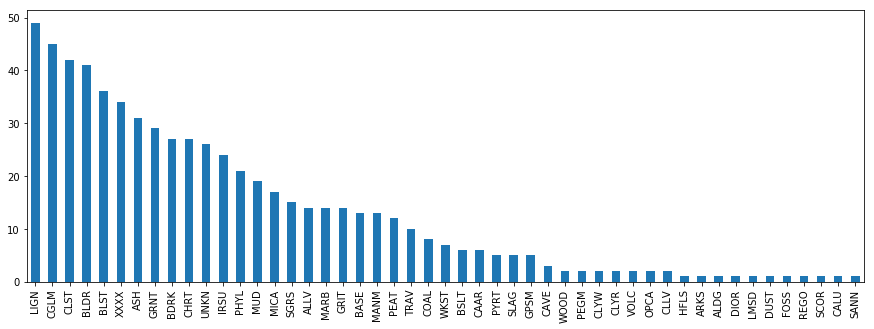

In [28]:
#Plot a bar chart of the lith codes for the rarer lithologies
lithCounts[(lithCounts < 50)].plot.bar(rot=90,figsize=(15,5))

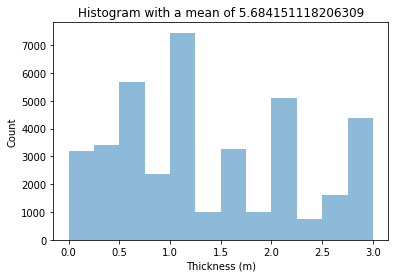

In [29]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
 
# example data
mu = np.mean(log_data['Thickness'].values) # mean of distribution
sigma = np.std(log_data['Thickness'].values) # standard deviation of distribution
x = log_data['Thickness'].values
# the histogram of the data
plt.hist(x, bins=[0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2,2.25,2.5,2.75,3.0], alpha=0.5)
plt.xlabel('Thickness (m)')
plt.ylabel('Count')
mystring="Histogram with a mean of "+ str(mu)
plt.title(mystring)
 
# Tweak spacing to prevent clipping of ylabel
#plt.subplots_adjust(left=0.15)
plt.show()




In [30]:
# import numpy as np
# cmap = plt.get_cmap('viridis')
# colors = cmap(np.linspace(0, 1, len(lithCounts.index)))
# colors

# for row in log_data.itertuples():
#     boreid=row[3]
#     for ind,value in enumerate(recs):  
#         try:
#             value.index(boreid)
#             print(recs)
#         except:
#             continue
#     #(row[3])



# for ind, value in enumerate(recs):
#     #Get the lat lon value
#     lon=value[18]
#     lat=value[17]
#     #Get the Lithology unit
#     value[]
    
#     #Now plot it
#     plt.plot(lon,lat,"|")

# Exercise
Go to http://www.bom.gov.au/water/groundwater/explorer/map.shtml and pick another River Region. Download the dataset in "Shapefile" format (this will downlaod the csv also). Once you have the data, follow the same routines as above and see what you can find out about the river region. Submit your jupyter notebook for review.